In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
cesta_k_suboru1 = r'c:\Users\firda\OneDrive\Študijný materiál\VŠ\2024 LS 2.rocnik\NeuronoveSiete\Zadanie\PI_DataLink_Aglo_digital twins-5min-SP4-2018-30minute.xlsm'
nazov_listu1 = 'Sheet1'
data1 = pd.read_excel(cesta_k_suboru1, sheet_name=nazov_listu1)

data1 = data1.iloc[3:, 2:]
data1 = data1.reset_index(drop=True)
data1

,Unnamed: 2,Unnamed: 3,výstupné dáta,výstupné dáta.1,výstupné dáta.2,"výstupné dáta, látkové filtre - pred komínom","vstupné dáta, 3 stupen miesania, reguluje palič","vstupné dáta, reguluje palič","vstupné dáta, 3 stupeň","vstupné dáta, reguluje palič.1",...,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204
0,2018-01-01 10:00:00,2018-01-01 10:30:00,18.279808,703.252156,24.328608,0,1,228.477436,0,3.779483,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
1,2018-01-01 10:30:00,2018-01-01 11:00:00,18.11305,700.13979,26.645883,0,1,228.074851,0,3.779492,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
2,2018-01-01 11:00:00,2018-01-01 11:30:00,18.280258,709.188462,26.889692,0,1,227.750251,0,3.770042,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
3,2018-01-01 11:30:00,2018-01-01 12:00:00,18.2676,704.970265,25.165058,0,1,227.996559,0,3.775433,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
4,2018-01-01 12:00:00,2018-01-01 12:30:00,18.28035,710.909716,24.855775,0,1,228.087685,0,3.7528,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,2018-12-31 09:30:00,2018-12-31 10:00:00,18.816999,705.377481,75.309609,0,1,228.062101,0,4.16295,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17472,2018-12-31 10:00:00,2018-12-31 10:30:00,18.816999,705.049167,89.836509,0,1,227.973419,0,4.168333,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17473,2018-12-31 10:30:00,2018-12-31 11:00:00,18.816999,707.584468,77.117459,0,1,227.797426,0,4.157475,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17474,2018-12-31 11:00:00,2018-12-31 11:30:00,18.816999,708.277203,81.320284,0,1,228.163453,0,4.150375,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader

c:\Users\firda\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Získanie indexu stĺpca 'vstupné dáta.3'
index_stlpca = data1.columns.get_loc('vstupné dáta.2')

# Odstránenie stĺpcov od stĺpca 'vstupné dáta.3' a riadkov po ňom
data = data1.iloc[:, :index_stlpca]


data = data.drop('Unnamed: 2', axis=1)
data = data.drop('Unnamed: 3', axis=1)
data = data.drop('výstupné dáta, látkové filtre - pred komínom', axis=1)
data = data.drop('vstupné dáta, 3 stupeň', axis=1)
data = data.drop('Unnamed: 12', axis=1)
data = data.drop('Unnamed: 13', axis=1)
data = data.drop('Unnamed: 14', axis=1)
data = data.drop('Unnamed: 16', axis=1)
data = data.drop('výstupné dáta.3', axis=1)
data = data.drop('výstupné dáta.4', axis=1)
data = data.drop('Unnamed: 27', axis=1)
#data = data.drop('výstupné dáta.5', axis=1)
data = data.drop('Unnamed: 30', axis=1)
#No Good Data For Calculation
data = data.drop('vstupné dáta, 3 stupen miesania, reguluje palič', axis=1)
data = data.drop('vstupné dáta, reguluje palič.2', axis=1)
data = data.drop('vstupné dáta', axis=1)
data = data.drop('vstupné dáta, reguluje palič.10', axis=1)

# Vypísanie upravených dát
data

,výstupné dáta,výstupné dáta.1,výstupné dáta.2,"vstupné dáta, reguluje palič","vstupné dáta, reguluje palič.1","vstupné dáta, reguluje palič.3","vstupné dáta, reguluje palič.4","vstupné dáta, reguluje palič.5","vstupné dáta, reguluje palič.6","vstupné dáta, reguluje palič.7",...,výstupné dáta.8,výstupné dáta.9,výstupné dáta.10,výstupné dáta.11,výstupné dáta.12,výstupné dáta.13,výstupné dáta.14,výstupné dáta.15,vstupné dáta.1,"vstupné dáta, reguluje palič.12"
0,18.279808,703.252156,24.328608,228.477436,3.779483,3.22,-4.313583,-4.316767,-5.127675,-4.387867,...,140.072683,131.876908,166.821242,175.863916,181.072325,199.353868,165.925166,115.124108,0.755392,2.002942
1,18.11305,700.13979,26.645883,228.074851,3.779492,3.22,-4.316142,-4.303767,-5.10665,-4.376208,...,124.651984,117.038342,159.061707,171.253558,181.738807,202.657243,167.574825,118.285308,0.740342,1.9833
2,18.280258,709.188462,26.889692,227.750251,3.770042,3.22,-4.16,-4.13675,-4.945667,-4.244733,...,124.524768,115.315375,162.086675,160.254149,193.0663,217.129942,191.433066,127.390316,0.737,1.974083
3,18.2676,704.970265,25.165058,227.996559,3.775433,3.22,-4.191742,-4.174617,-4.972683,-4.253458,...,120.230441,107.663042,155.757768,154.614825,183.914683,212.790476,188.9894,128.269024,0.730508,1.9576
4,18.28035,710.909716,24.855775,228.087685,3.7528,3.22,-4.08915,-4.063367,-4.871258,-4.135233,...,123.847326,111.292667,152.090241,146.857391,176.738442,203.662459,183.656509,127.13895,0.730458,1.95075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,18.816999,705.377481,75.309609,228.062101,4.16295,3.53,-3.860658,-4.832058,-5.604483,-4.973208,...,98.820033,119.300874,119.8567,118.36125,106.9638,157.149584,179.884384,151.258817,0.7125,2.04165
17472,18.816999,705.049167,89.836509,227.973419,4.168333,3.53,-3.812375,-4.79335,-5.589908,-4.9491,...,103.994658,125.246243,122.319942,119.65615,110.222717,158.241693,182.536584,154.473742,0.711358,2.036742
17473,18.816999,707.584468,77.117459,227.797426,4.157475,3.53,-3.721008,-4.642475,-5.405375,-4.787342,...,111.492883,133.400609,130.402317,132.115683,120.702633,172.917275,194.002358,161.987158,0.711575,2.03715
17474,18.816999,708.277203,81.320284,228.163453,4.150375,3.53,-3.688233,-4.610583,-5.381467,-4.727975,...,112.281008,141.0531,137.857433,138.726817,127.203275,173.819849,186.804325,152.606066,0.71135,2.037417


In [5]:
cesta_k_suboru_vystup = 'data.xlsx'
data.to_excel(cesta_k_suboru_vystup, index=False)

In [6]:
data_numeric = data.apply(pd.to_numeric, errors='coerce').dropna()

X = data_numeric.drop(columns=["výstupné dáta.5"])
y = data_numeric["výstupné dáta.5"]

#y_original = y.values.reshape(-1, 1)
scaler = StandardScaler()
#X = (X - X.mean()) / X.std()
X_scaled = scaler.fit_transform(X)

#scaler_y = MinMaxScaler()
#y_scaled = scaler_y.fit_transform(y_original)

# Splitting the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=1234, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234, shuffle=True)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32) 
y_val = torch.tensor(y_val, dtype=torch.float32) 
y_test = torch.tensor(y_test, dtype=torch.float32)

train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)
val = TensorDataset(X_val, y_val)

# Vytvorenie dataloaders pre trénovaciu a testovaciu sadu
train_loader = DataLoader(train, batch_size=64, shuffle=False)
test_loader = DataLoader(test, batch_size=64, shuffle=False)
validation_loader = DataLoader(val, batch_size=64, shuffle=False)

In [7]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

(torch.Size([10327, 25]),
 torch.Size([10327]),
 torch.Size([3442, 25]),
 torch.Size([3442]))

In [8]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, dropout):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim 
        self.layer_dim = layer_dim 
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, dropout = 0.3, batch_first=True)

        self.fc = nn.Linear(hidden_dim, 32)  
        self.fc1 = nn.Linear(32, 1)  
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

         # Forward propagation through LSTM layer
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out)
        # Index hidden state of last time step
        out = nn.functional.relu(self.fc(out[:, -1, :]))
        #out = out[:, -1, :]
        out = self.dropout(out)
        #out = self.fc(out)
        #out = self.dropout(out)
        out = self.fc1(out)
        return out


In [9]:
num_epochs = 100
input_dim = len(X.columns)  # Počet číselných atribútov vo vstupných dátach
hidden_dim = 100
layer_dim = 3

model = LSTMModel(input_dim, hidden_dim, layer_dim, dropout=0.2)

error = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
loss_list = []
iteration_list = []
validation_loss_list = [] 
iterations = 0
for epoch in range(num_epochs):
    model.train() 
    for i, (data, labels) in enumerate(train_loader):
       
        data = data.view(-1, 1, input_dim).requires_grad_()
        
        optimizer.zero_grad()
        
        outputs = model(data)
        
        loss = error(outputs.squeeze(), labels)
        
        loss.backward()
        
        optimizer.step()
        iterations += 1

        
        if iterations % 100 == 0:
            loss_list.append(loss.item())
            iteration_list.append(iterations)

            # Výpis straty
            print('Iteration: {}. Loss: {}'.format(iterations, loss.item()))

            model.eval()  
            validation_loss = 0.0
            for data_val, labels_val in validation_loader:
                data_val = data_val.view(-1, 1, input_dim)
                outputs_val = model(data_val)
                loss_val = error(outputs_val.squeeze(), labels_val)
                validation_loss += loss_val.item() * data_val.size(0)  

            validation_loss /= len(validation_loader.dataset)  
            validation_loss_list.append(validation_loss)
            print('Validation Loss: {}'.format(validation_loss))

Iteration: 100. Loss: 11.578798294067383
Validation Loss: 8.365357387904023
Iteration: 200. Loss: 9.063539505004883
Validation Loss: 8.601578972354869
Iteration: 300. Loss: 14.941839218139648
Validation Loss: 7.840715351248813
Iteration: 400. Loss: 6.27557897567749
Validation Loss: 7.373493598824944
Iteration: 500. Loss: 9.645133018493652
Validation Loss: 7.634277083027301
Iteration: 600. Loss: 4.885931968688965
Validation Loss: 6.4091284281981675
Iteration: 700. Loss: 4.316152572631836
Validation Loss: 6.565181567321192
Iteration: 800. Loss: 6.75288200378418
Validation Loss: 5.889815641100638
Iteration: 900. Loss: 7.551275730133057
Validation Loss: 5.876533230122683
Iteration: 1000. Loss: 7.783758163452148
Validation Loss: 6.3768192861469455
Iteration: 1100. Loss: 5.24850606918335
Validation Loss: 5.669472319937112
Iteration: 1200. Loss: 5.7799072265625
Validation Loss: 7.291187557074166
Iteration: 1300. Loss: 5.368293762207031
Validation Loss: 6.3041996681572465
Iteration: 1400. Loss

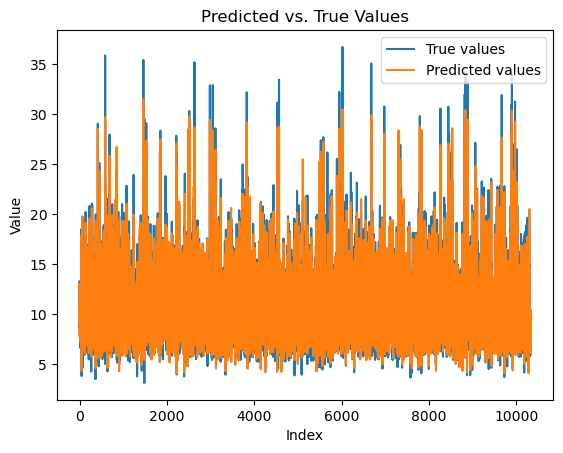

In [11]:
model.eval()

# Predikcia hodnôt pre testovaciu sadu
predicted_values = []
true_values = []

with torch.no_grad():
    for data, labels in train_loader:
        data = data.view(-1, 1, 25)
        outputs = model(data)
        predicted_values.extend(outputs.cpu().numpy())
        true_values.extend(labels.cpu().numpy())

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(true_values, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

In [12]:
model.eval()

# Predikcia na testovacej sade
with torch.no_grad():
    for data, labels in train_loader:
        # Predikcia
        outputs = model(data.view(-1, 1, input_dim))
        
        # Vypísanie predikovaných a skutočných hodnôt
        for i in range(len(outputs)):
            print("Predikovaná hodnota:", outputs[i].item(), "| Skutočná hodnota:", labels[i].item())

Predikovaná hodnota: 9.026307106018066 | Skutočná hodnota: 8.697718620300293
Predikovaná hodnota: 13.029838562011719 | Skutočná hodnota: 13.304007530212402
Predikovaná hodnota: 12.624749183654785 | Skutočná hodnota: 12.20694637298584
Predikovaná hodnota: 8.489519119262695 | Skutočná hodnota: 9.578149795532227
Predikovaná hodnota: 12.639327049255371 | Skutočná hodnota: 12.718854904174805
Predikovaná hodnota: 7.838576793670654 | Skutočná hodnota: 7.76531457901001
Predikovaná hodnota: 10.826770782470703 | Skutočná hodnota: 11.325948715209961
Predikovaná hodnota: 8.884603500366211 | Skutočná hodnota: 8.81142807006836
Predikovaná hodnota: 9.835537910461426 | Skutočná hodnota: 10.001513481140137
Predikovaná hodnota: 9.214143753051758 | Skutočná hodnota: 9.717275619506836
Predikovaná hodnota: 9.817309379577637 | Skutočná hodnota: 11.184218406677246
Predikovaná hodnota: 7.248845100402832 | Skutočná hodnota: 8.355256080627441
Predikovaná hodnota: 12.076465606689453 | Skutočná hodnota: 12.701501

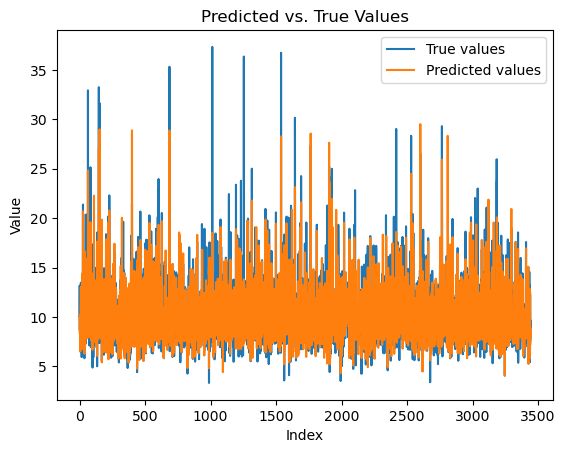

In [13]:
model.eval()

# Predikcia hodnôt pre testovaciu sadu
predicted_values = []
true_values = []

with torch.no_grad():
    for data, labels in test_loader:
        data = data.view(-1, 1, input_dim)
        outputs = model(data)
        predicted_values.extend(outputs.cpu().numpy())
        true_values.extend(labels.cpu().numpy())

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(true_values, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

In [14]:
model.eval()

# Predikcia na testovacej sade
with torch.no_grad():
    for data, labels in test_loader:
        # Predikcia
        outputs = model(data.view(-1, 1, input_dim))
        
        # Vypísanie predikovaných a skutočných hodnôt
        for i in range(len(outputs)):
            print("Predikovaná hodnota:", outputs[i].item(), "| Skutočná hodnota:", labels[i].item())

Predikovaná hodnota: 10.167341232299805 | Skutočná hodnota: 10.099970817565918
Predikovaná hodnota: 9.568170547485352 | Skutočná hodnota: 13.17207145690918
Predikovaná hodnota: 8.352701187133789 | Skutočná hodnota: 8.696885108947754
Predikovaná hodnota: 9.776973724365234 | Skutočná hodnota: 10.141523361206055
Predikovaná hodnota: 9.445293426513672 | Skutočná hodnota: 8.224547386169434
Predikovaná hodnota: 8.93439769744873 | Skutočná hodnota: 10.330464363098145
Predikovaná hodnota: 6.524318695068359 | Skutočná hodnota: 6.510267734527588
Predikovaná hodnota: 7.7031755447387695 | Skutočná hodnota: 9.538117408752441
Predikovaná hodnota: 11.05838394165039 | Skutočná hodnota: 11.421849250793457
Predikovaná hodnota: 11.151633262634277 | Skutočná hodnota: 11.002998352050781
Predikovaná hodnota: 12.988186836242676 | Skutočná hodnota: 13.472461700439453
Predikovaná hodnota: 10.680017471313477 | Skutočná hodnota: 10.366608619689941
Predikovaná hodnota: 13.047525405883789 | Skutočná hodnota: 11.91